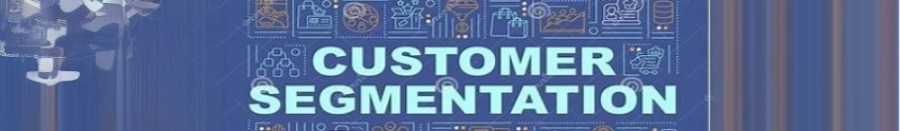

<h1 style="background-color:rgba(255, 99, 71, 0.6);">Problem Statement </H1>

Customer Personality Analysis is a detailed look at a company's ideal customers. It helps a business understand its customers better, allowing them to adjust products to meet the specific needs, behaviors, and concerns of different customer types.

By using Customer Personality Analysis, a business can tailor its products based on the preferences of its target customers from various segments. For example, instead of spending money to market a new product to every customer, the company can identify which customer group is most likely to buy the product and focus its marketing efforts on that group.

<h1 style="background-color:rgba(255, 99, 71, 0.6);">Importing the Libraries </H1>

In [3]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
data = pd.read_csv(r"C:\Users\rishu\Downloads\marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<h1 style="background-color:rgba(255, 99, 71, 0.6);"> About Data </H1>

# People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

# Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month Target Need to perform clustering to summarize customer segments.

<h1 style="background-color:rgba(255, 99, 71, 0.6);">Data Cleaning

In this section, I will focus on:

1. Data Cleaning
2. Feature Engineering

To understand the necessary steps for cleaning the dataset, let's first examine the information in the data.

In [5]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**

1. There are missing values in the income column.
2. The "Dt_Customer" column, which indicates the date a customer joined the database, is not parsed as DateTime.
3. There are some categorical features in our data frame (features with dtype: object) that need to be encoded into numeric forms later.

**First, I will address the missing values by dropping the rows with missing income values.**

In [6]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


To create a feature indicating the number of days a customer has been registered in the firm's database, I will use "Dt_Customer" and calculate this value relative to the most recent customer record. To achieve this, I need to identify the newest and oldest recorded dates in the data.

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format = "%d-%m-%Y")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates)) 

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In the next step, we will create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

**Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date**

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

**Next, we will explore the unique values in the categorical features to gain a better understanding of the data.**

In [9]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts()) 

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**In the next steps, I will be engineering new features as follows:**

1. Extract the "Age" of a customer from the "Year_Birth" indicating the birth year of the respective person.
2. Create a feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
3. Create a feature "Living_With" from "Marital_Status" to indicate the living situation of couples.
4. Create a feature "Children" to indicate the total number of children in a household, including kids and teenagers.
5. Create a feature "Family_Size" to provide further clarity on household size.
6. Create a feature "Is_Parent" to indicate parenthood status.
7. Simplify the "Education" feature by categorizing its values into three groups.
8. Drop some of the redundant features.

In [10]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2024-data["Year_Birth"]  

In [11]:
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [12]:
#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [13]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [14]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [15]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [16]:
#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


In [17]:
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [18]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

**Now that we have created some new features, let's examine the statistical summary of the data.**

In [19]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


The above statistics reveal some discrepancies in the mean and maximum values of Income and Age. Notably, the maximum age is 128 years, which I calculated based on today's date (2021), indicating that the data is old.

To gain a broader view of the data, I will plot some of the selected features. The plots should be simple and easy to understand.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

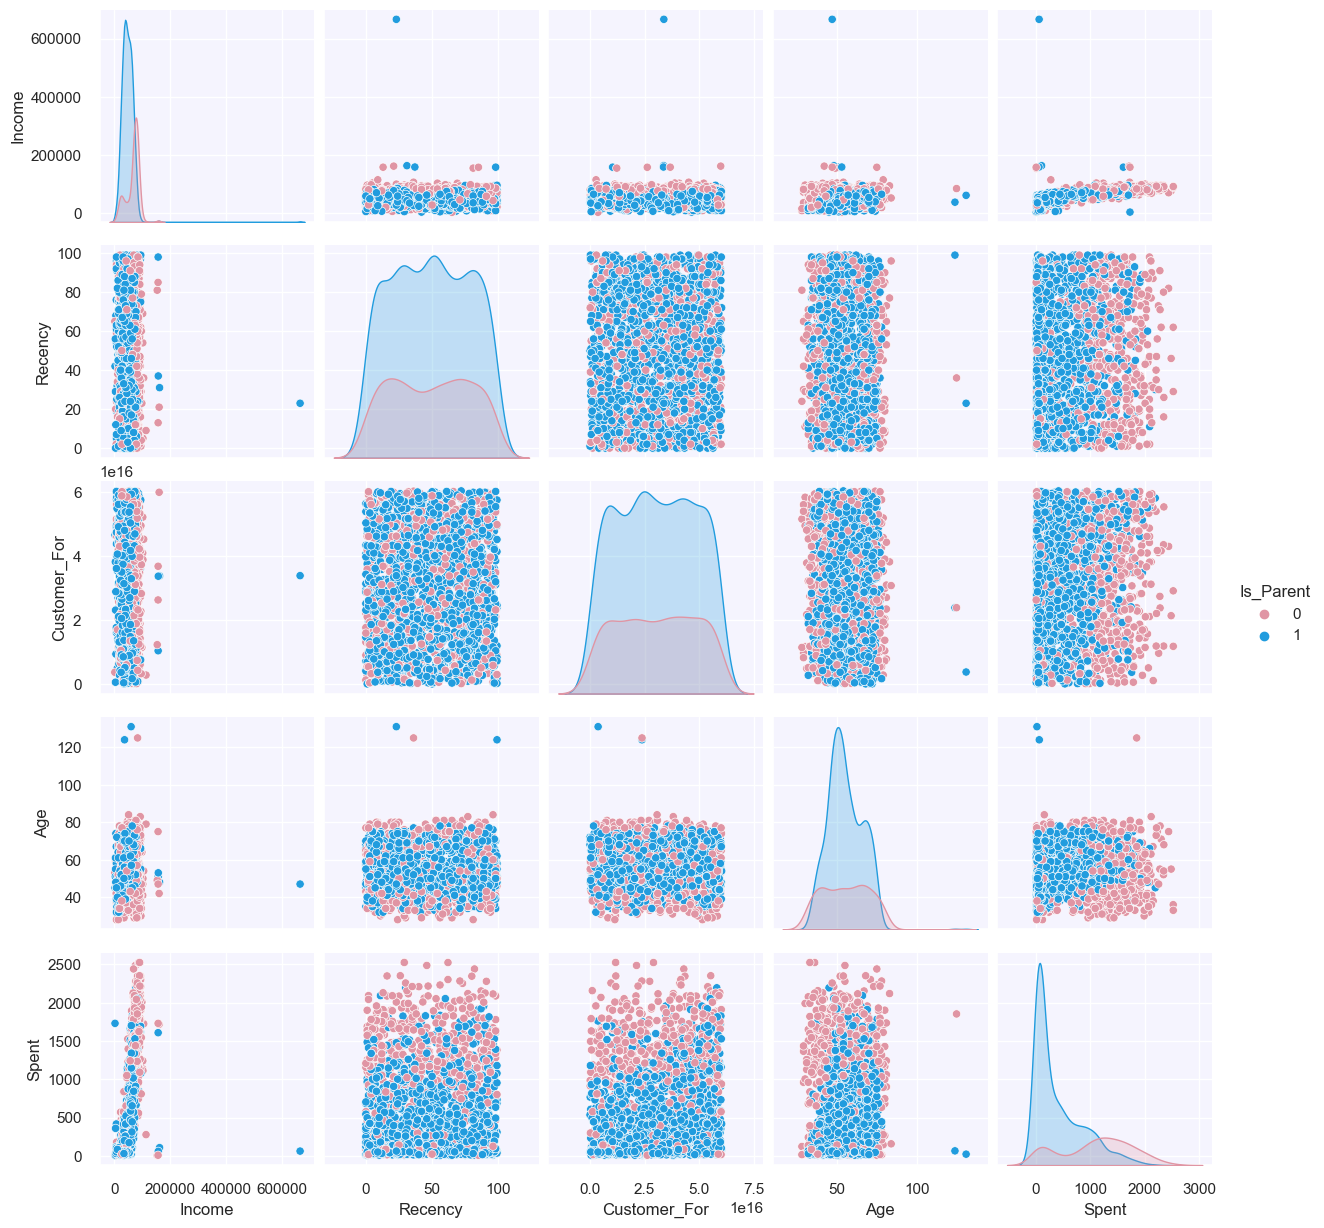

In [20]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#F5F4FE"})
pallet = ["#A90C38", "#5E8DB8", "#A90C38", "#11692E", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#CFDCEF", "#B9C0C9", "#1C5F9E", "#2DC194"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#E095A4","#219CDE"]))
#Taking hue 
plt.show()


**The provided graph is a pair plot, created using the seaborn library in Python. A pair plot is used to visualize the pairwise relationships between multiple variables in a dataset. This specific pair plot includes scatter plots, histograms (or KDE plots), and color-coded categories based on the Is_Parent variable. Let's break down each part of the graph in detail.**

***General Structure***

**Diagonal plots:** These are histograms (or KDE plots) of each variable, showing the distribution of values for each variable individually.

**Off-diagonal scatter plots:** These are scatter plots that show pairwise relationships between variables.

**Color-coding:** Points are colored based on the Is_Parent variable, with two colors representing the different categories (0 and 1).

**Variables in the Dataset**

**1.Income**
              **2.Recency**
                            **3.Customer_For**
                                               **4.Age**
                                                         **5.Spent**
    **6.Is_Parent (categorical variable used for color-coding)**

***Detailed Explanation***

**1.Diagonal Plots:**

**Income:** The histogram/KDE plot shows that most customers have an income clustered around a lower range, with fewer customers having very high incomes.

**Recency:** The distribution of the recency variable appears to be relatively uniform, indicating a spread-out range of recency values.

**Customer_For:** This plot is unusual, showing a single spike, which suggests that the values might be constant or have a very high concentration at a specific value.

**Age:** The age distribution is relatively uniform, indicating that customers are evenly distributed across different age groups.

**Spent:** The histogram/KDE plot shows that most customers have spent amounts clustered around a lower range, with fewer customers having very high spending amounts.

**2.Off-Diagonal Scatter Plots:**

**Income vs. Recency:** There doesn't appear to be a strong relationship between income and recency.

**Income vs. Customer_For:** The relationship is unclear due to the unusual distribution of Customer_For.

**Income vs. Age:** No clear pattern or correlation is visible between income and age.

**Income vs. Spent:** There might be a slight positive correlation, indicating that higher income might be associated with higher spending, but it's not very pronounced.

**Recency vs. Customer_For:** No clear relationship is visible.

**Recency vs. Age:** No strong pattern or correlation is visible.

**Recency vs. Spent:** No strong pattern or correlation is visible.

**Customer_For vs. Age:** No clear relationship due to the unusual distribution of Customer_For.

**Customer_For vs. Spent:** No clear relationship due to the unusual distribution of Customer_For.

**Age vs. Spent:** No strong pattern or correlation is visible.

***3.Color-Coding by Is_Parent:***

The data points are color-coded to indicate whether a customer is a parent (1) or not (0).
The color coding helps to identify any potential patterns or clusters based on the Is_Parent variable. For instance, there doesn't appear to be a strong separation between parents and non-parents in any of the scatter plots, indicating that the Is_Parent status might not be strongly correlated with any of the other variables.

<h1 style="background-color:rgba(255, 99, 71, 0.6);">Summary</H1>

The pair plot provides a comprehensive overview of the relationships between the variables in the dataset. Here are some key takeaways:

**Income and Spent:** There might be a slight positive correlation.

**Recency, Age, and Is_Parent:** These variables do not show clear relationships with other variables.

**Customer_For:** This variable shows an unusual distribution, which might need further investigation or preprocessing.

This type of visualization is useful for exploratory data analysis (EDA) to identify patterns, correlations, and potential outliers in the dataset.


**Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.**

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

**Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)**

<Axes: >

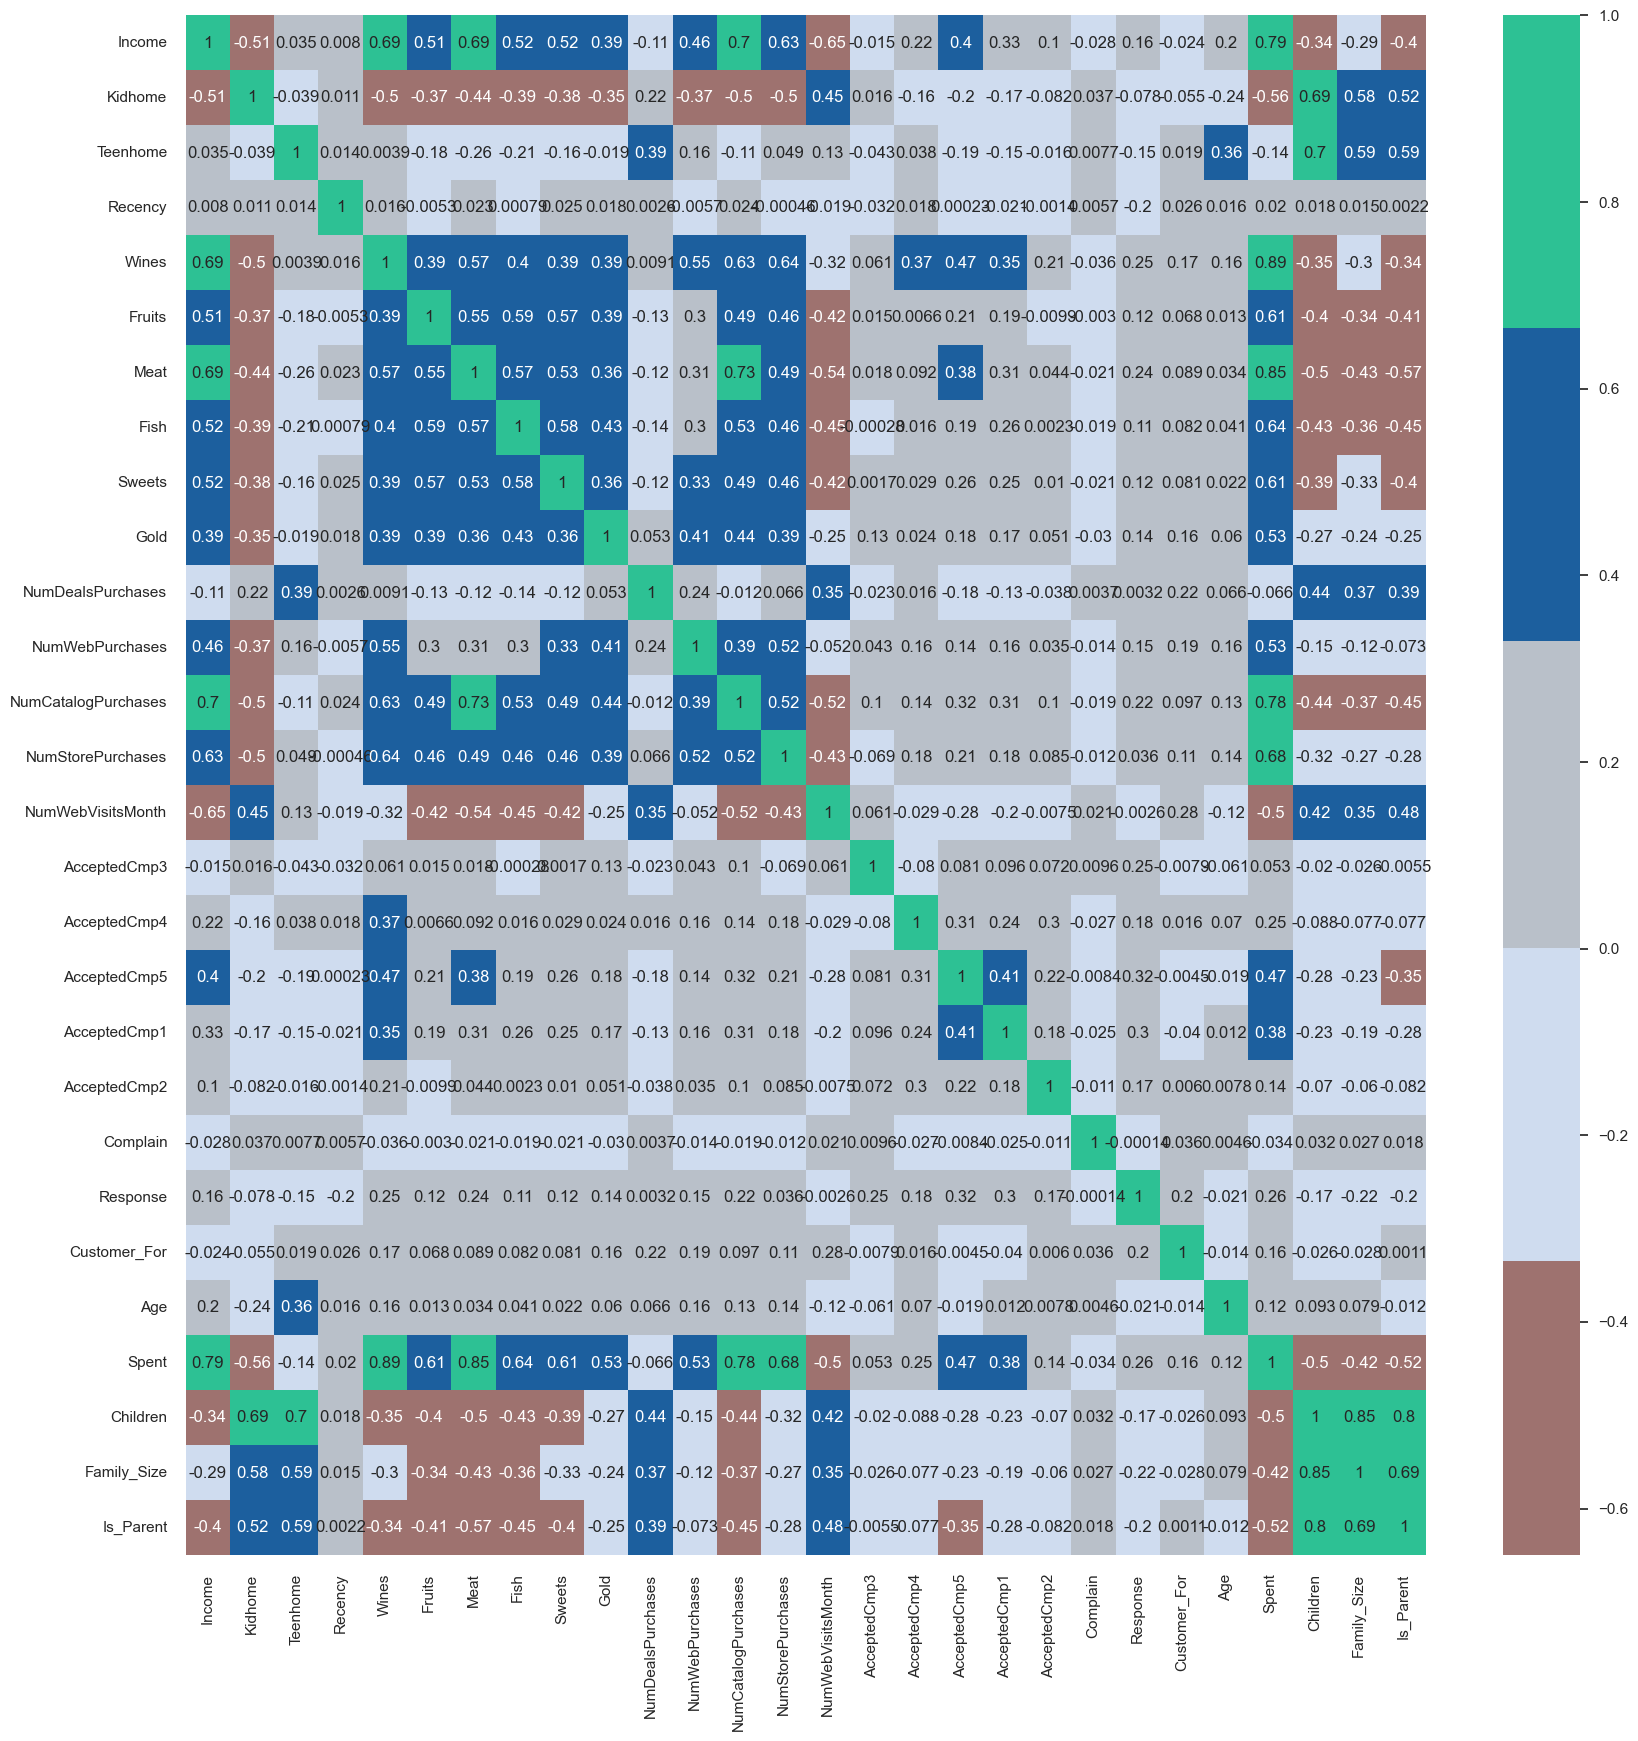

In [22]:
#correlation matrix
corrmat= data.select_dtypes(exclude= "object").corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

<h1 style="background-color:rgba(255, 99, 71, 0.6);">DATA PREPROCESSING

**In this section, I will preprocess the data to perform clustering operations. The preprocessing steps include:**

Label encoding the categorical features.
Scaling the features using the standard scaler.
Creating a subset dataframe for dimensionality reduction.
These steps will ensure the data is ready for clustering.

In [23]:
object_cols=data.select_dtypes(object).columns
object_cols
print(f"Categorical variables in the dataset: {object_cols[0]},{object_cols[1]}")

Categorical variables in the dataset: Education,Living_With


In [24]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [25]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [26]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head() 

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<h1 style="background-color:rgba(255, 99, 71, 0.6);">DIMENSIONALITY REDUCTION

In this problem, there are many factors, or features, that will influence the final classification. The higher the number of features, the more challenging it becomes to work with them. Many of these features are correlated and redundant, so I will perform dimensionality reduction before using them in a classifier. Dimensionality reduction simplifies the data by reducing the number of variables while preserving important information.

Principal Component Analysis (PCA) is a technique used for this purpose. It reduces the dimensionality of datasets, making them easier to interpret while minimizing information loss.

**Steps in this section:**

1. Perform dimensionality reduction with PCA.
2. Plot the reduced dataframe.
3. Reduce the dimensions to 3 for this project.

In [3]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

NameError: name 'PCA' is not defined

**Variance Explained:** PCA reduces dimensionality by finding new axes (principal components) that capture the maximum variance in the data. Often, a small number of components can capture most of the important information (variance). The choice of 3 components likely reflects a balance between simplification and retaining enough information.

**Visualization:** Reducing data to 3 components makes it possible to visualize the data in a 3D plot, which is easier to interpret than higher-dimensional visualizations.

**Computational Efficiency:** Reducing the number of features decreases the computational cost of subsequent analyses and models, making them faster to train and easier to understand.

In [2]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

NameError: name 'PCA_ds' is not defined

<h1 style="background-color:rgba(255, 99, 71, 0.6);"> CLUSTERING</h1>

Now that I have reduced the attributes to three dimensions, I will perform clustering using Agglomerative Clustering. This is a hierarchical method that merges data points until the desired number of clusters is reached.</p>

**Steps involved in the clustering process:**

1. Use the Elbow Method to determine the optimal number of clusters.
2. Perform clustering using Agglomerative Clustering.
3. Examine the clusters formed with a scatter plot.

Elbow Method to determine the number of clusters to be formed:


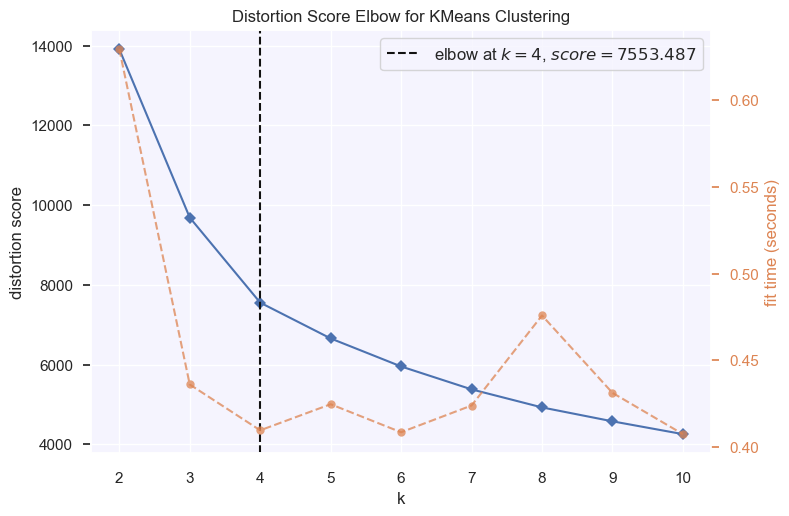

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters. ( why we are using AgglomerativeClusrting?)

In [31]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

___To examine the clusters formed let's have a look at the 3-D distribution of the clusters___

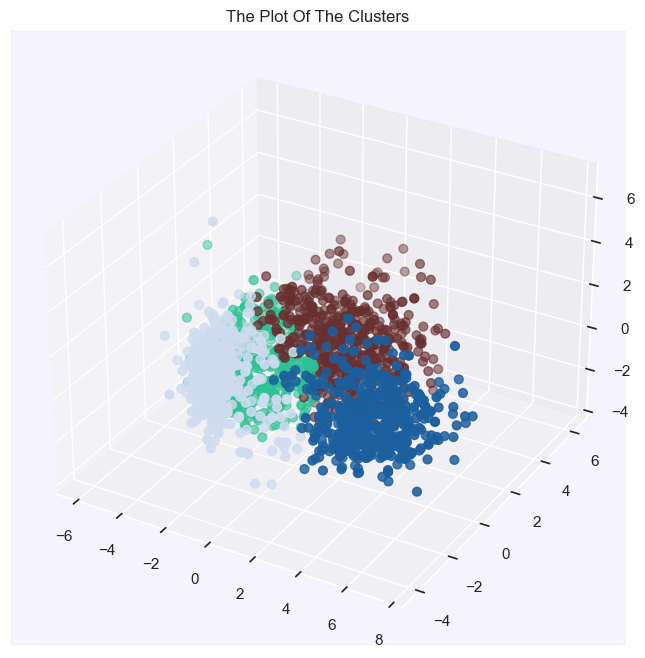

In [32]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<h1 style="background-color:rgba(255, 99, 71, 0.6);">EVALUATING MODELS

Since this is an unsupervised clustering task, we don't have labeled features to evaluate or score our model directly. The goal of this section is to examine the patterns within the formed clusters and understand their characteristics.

To achieve this, we will perform exploratory data analysis on the clustered data and draw conclusions based on our observations.


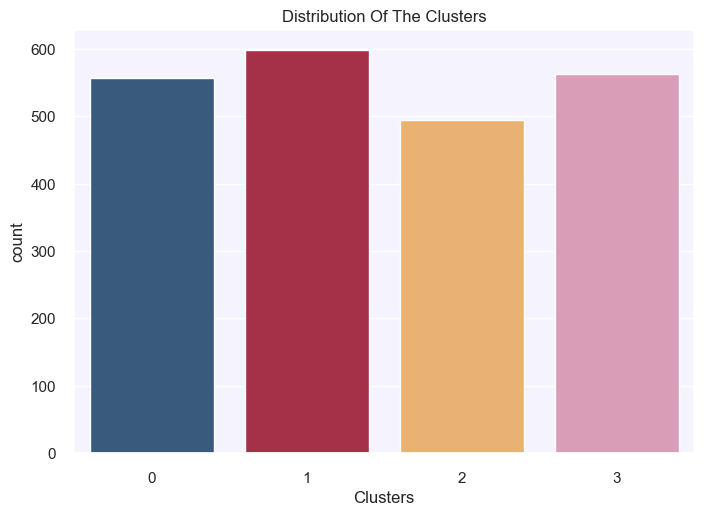

In [35]:
#Plotting countplot of clusters
pal = ["#2E5A87","#B91D3C", "#FEB35E","#E393B7"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

__The clusters are be fairly distributed.__

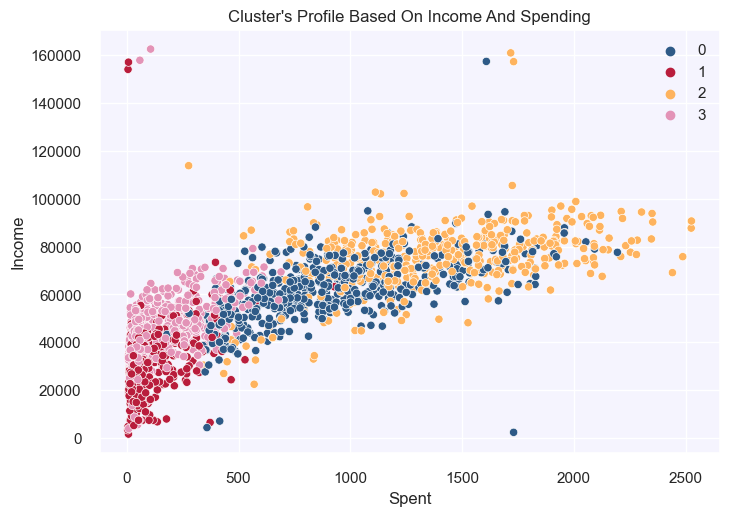

In [36]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

***The Income vs. Spending plot reveals the following cluster patterns:***

**Group 0:** High spending, average income

**Group 1:** High spending, high income

**Group 2:** Low spending, low income

**Group 3:** High spending, low income

Next, I will examine the detailed distribution of clusters across various products in the data, including Wines, Fruits, Meat, Fish, Sweets, and Gold.

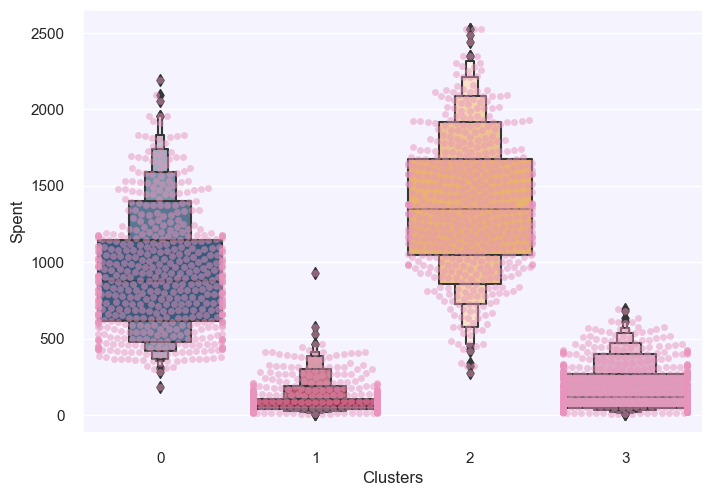

In [40]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#E994BD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

The plot clearly shows that cluster 2 comprises our largest group of customers, closely followed by cluster 0. By examining the spending patterns of each cluster, we can develop targeted marketing strategies.

__Next, let's analyze the performance of our past campaigns.__

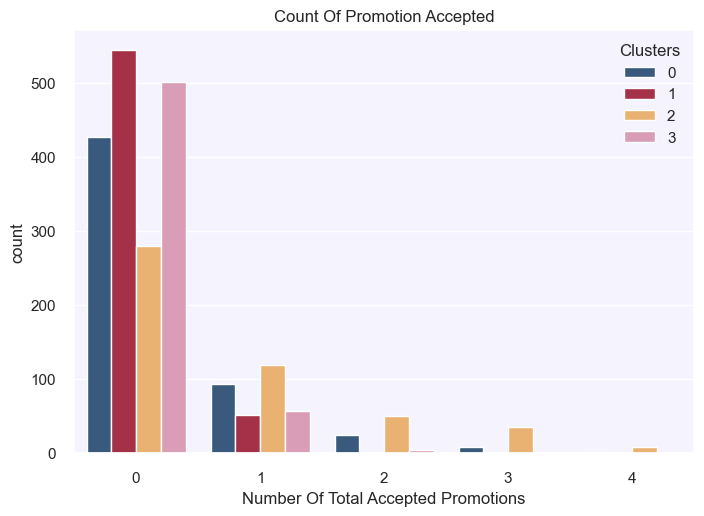

In [41]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

The response to the campaigns has been underwhelming, with very few participants overall. Additionally, no one has participated in all five campaigns. We may need better-targeted and well-planned campaigns to boost sales.

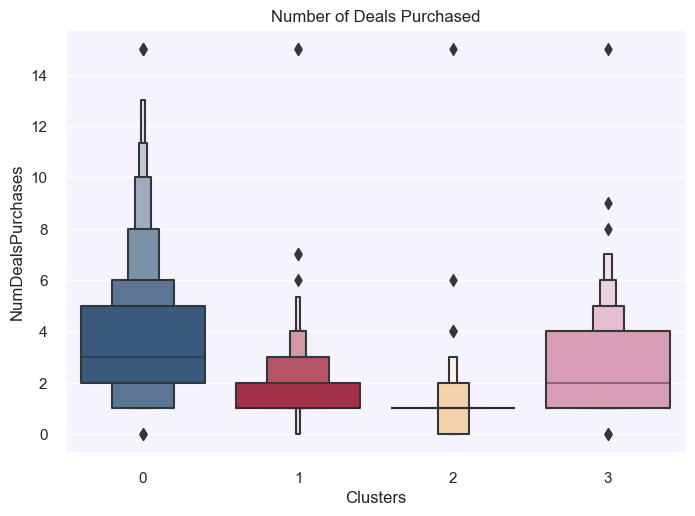

In [42]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike the campaigns, the deals offered performed well, especially with clusters 0 and 3. However, our star customers in cluster 1 didn't show much interest in the deals. Additionally, nothing seems to attract cluster 2 significantly.

<h1 style="background-color:rgba(255, 99, 71, 0.6);">PROFILING

Now that we’ve formed the clusters and examined their purchasing habits, we need to identify the individuals in each cluster. To do this, we will profile the clusters and determine who our star customers are and who requires more attention from the marketing team.

**I will plot features that reflect the customers' personal traits in relation to their clusters. Based on these outcomes, I will draw conclusions about each group.**

<Figure size 800x550 with 0 Axes>

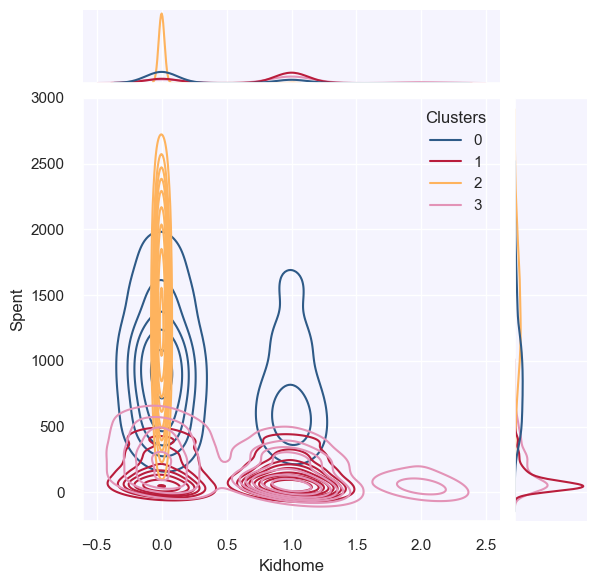

<Figure size 800x550 with 0 Axes>

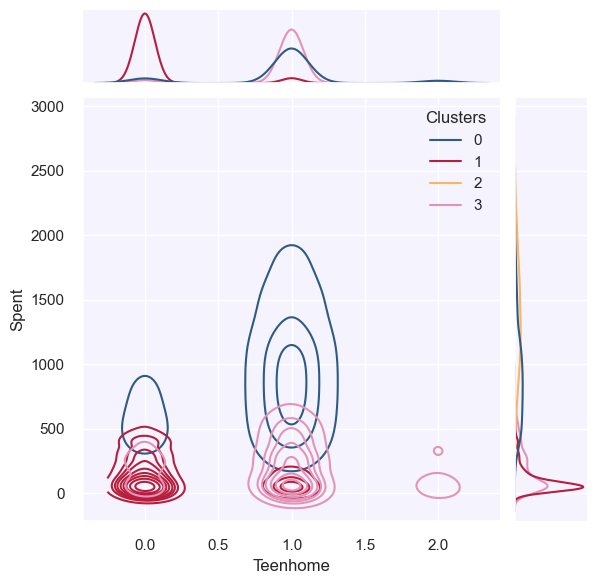

<Figure size 800x550 with 0 Axes>

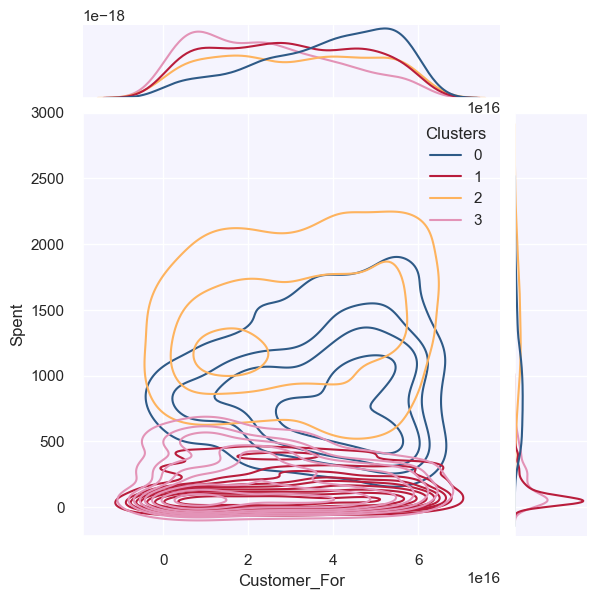

<Figure size 800x550 with 0 Axes>

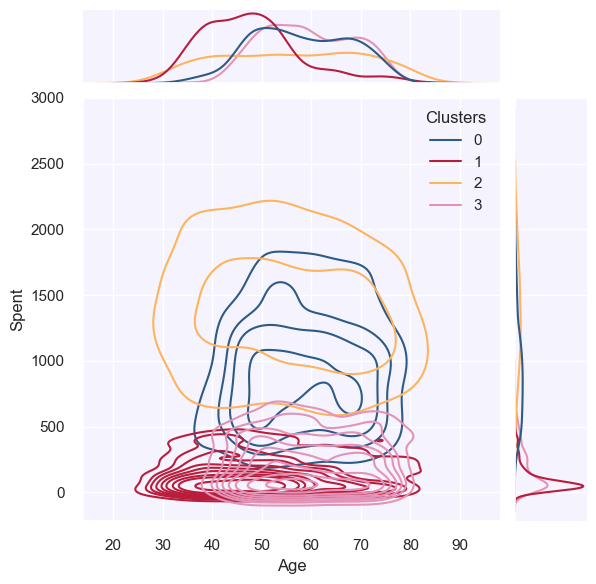

<Figure size 800x550 with 0 Axes>

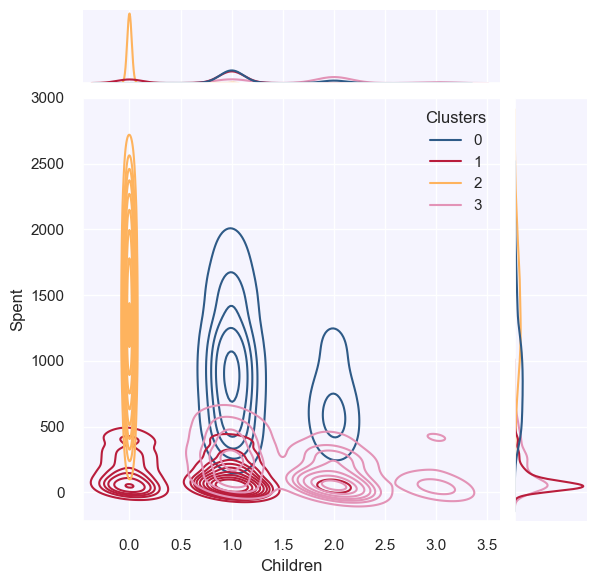

<Figure size 800x550 with 0 Axes>

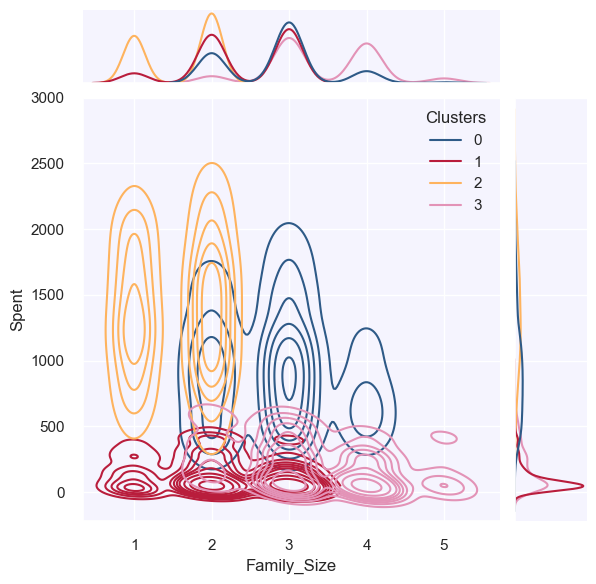

<Figure size 800x550 with 0 Axes>

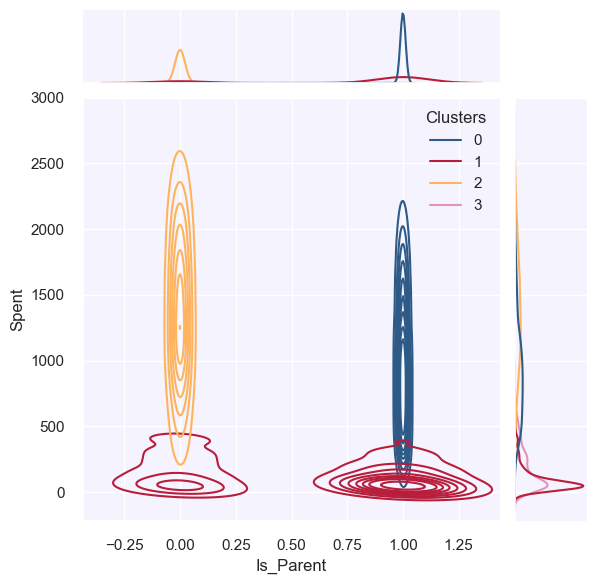

<Figure size 800x550 with 0 Axes>

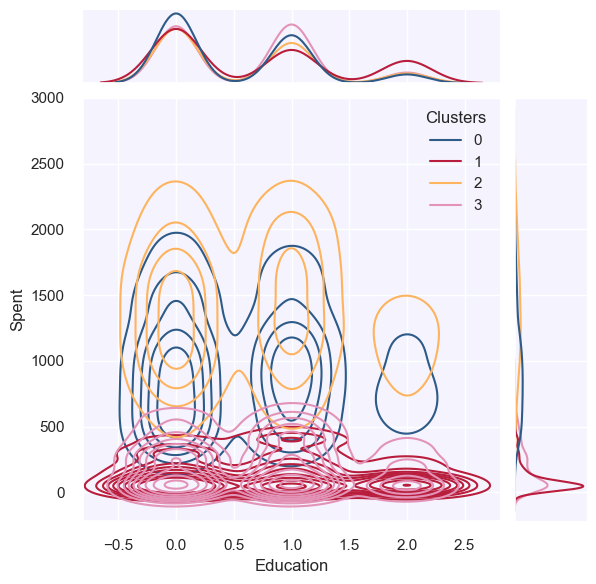

<Figure size 800x550 with 0 Axes>

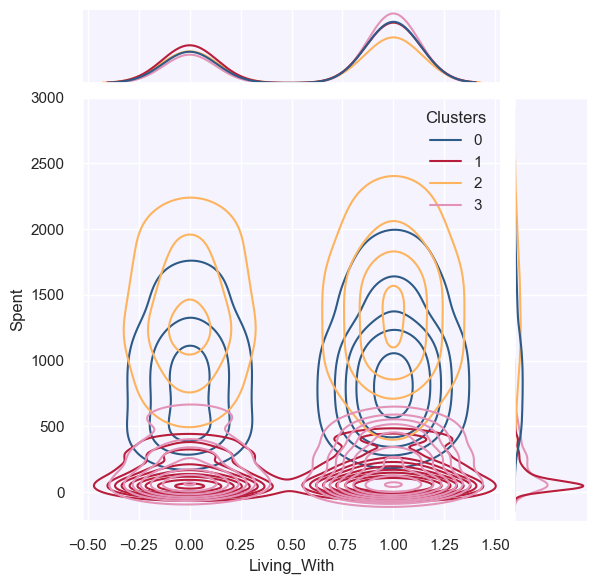

In [43]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

C0 = education, c0 =c0 , 2==1(Hamara), 1==2,3==3

 <h1 style="background-color:rgba(245, 95, 71, 0.6);"> Points to be noted:</H1>


The following information can be deduced about the customers in different clusters.

In [ ]:
<H1>About Cluster Number: 0</H1>
~ Are a definitely a parent

~ At the max have 4 members in the family and at least 2

~ Single parents are a subset of this group

~ Most have a teenager at home

~ Relatively older

<H1>About Cluster Number: 1</H1>

~ Are a definitely not a parent

~ At the max are only 2 members in the family

~ A slight majority of couples over single people

~ Span all ages

~ A high income group

<H1>About Cluster Number: 2</H1>

~ The majority of these people are parents

~ At the max are 3 members in the family.

~ They majorly have one kid (and not teenagers, typically)

~ Relatively younger

<H1>About Cluster Number: 3 </H1>

~ They are definitely a parent

~ At the max are 5 members in the family and at least 2

~ Majority of them have a teenager at horne

~ Relatively older

~ A lower-incorne group